<a href="https://colab.research.google.com/github/shivakumarsanugula/Kaggle-Deep-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
#Check the version of TensorFlow you are using
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.13.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Divide the dataset into independent and dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
## Feature Enginnering --One Hot eNCODONG
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [10]:
# Drop the Geography & Gender from original dataset and concate with new variables
X = X.drop(['Geography','Gender'],axis=True)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X = pd.concat([X,geography,gender],axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
# Splitting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [18]:
X_train.shape

(8000, 11)

In [19]:
## Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [20]:
## Lets Intialise the ANN

classifer = Sequential()

In [21]:
## Adding the input Layer
classifer.add(Dense(units=11,activation='relu'))

In [22]:
# Adding the First Hidden Layer
classifer.add(Dense(units=7,activation='relu'))

In [23]:
# Adding the second Hidden Layer
classifer.add(Dense(units=6,activation='relu'))

In [24]:
# Adding the output Layer
classifer.add(Dense(1,activation='sigmoid'))

In [25]:
# Learning Rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [26]:
# Train the neural network
classifer.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
# Early Stopping
import tensorflow as tf


early_stoping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [28]:
model_history=classifer.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stoping)

Epoch 1/1000
536/536 [==============================] - 11s 10ms/step - loss: 0.4324 - accuracy: 0.8171 - val_loss: 0.4331 - val_accuracy: 0.8213
Epoch 2/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.4003 - accuracy: 0.8350 - val_loss: 0.4136 - val_accuracy: 0.8304
Epoch 3/1000
536/536 [==============================] - 6s 12ms/step - loss: 0.3777 - accuracy: 0.8489 - val_loss: 0.3894 - val_accuracy: 0.8402
Epoch 4/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3640 - accuracy: 0.8520 - val_loss: 0.3722 - val_accuracy: 0.8455
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3587 - accuracy: 0.8539 - val_loss: 0.3690 - val_accuracy: 0.8497
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3519 - accuracy: 0.8554 - val_loss: 0.3703 - val_accuracy: 0.8425
Epoch 7/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3520 - accuracy: 0.8565 - val_loss: 0.3723 - val_accura

In [29]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

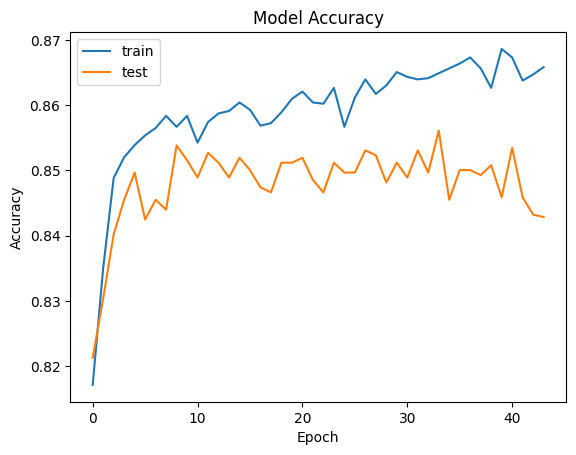

In [30]:
# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

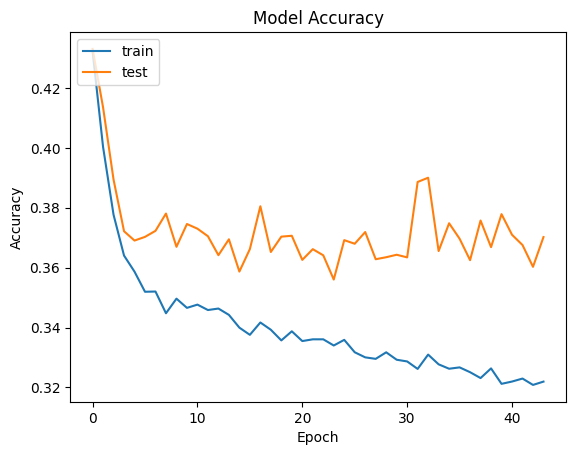

In [31]:
# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [32]:
# Making the predictions and Evaluating the model

# Predecting the Test set results

y_pred = classifer.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [33]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1530,   65],
       [ 224,  181]])

In [34]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8555

In [35]:
## Get the weights
classifer.get_weights()

[array([[-3.2481873e-01,  3.9347875e-01, -5.3116217e-02,  3.3194804e-01,
          4.5176557e-01,  1.6540244e-01, -2.2777516e-01, -2.9994026e-01,
          4.7217247e-01,  9.0522200e-01,  5.0401878e-01],
        [-3.1580327e+00, -2.5311680e+00,  6.5016891e-03, -1.5532033e+00,
         -3.3444902e-01, -1.7942246e+00,  1.4804152e+00, -1.1386915e+00,
          1.8130352e+00, -2.2242711e+00, -2.8284397e+00],
        [-1.5920317e-01,  6.1103785e-01, -2.3013495e-01,  1.8245517e+00,
          1.0307939e-01,  2.6519927e-01, -2.3205736e-01, -4.1718137e-01,
          6.5356290e-01,  5.3812814e-01, -8.4079668e-02],
        [ 2.7532130e-02,  1.2227700e+00,  8.2895893e-01,  1.1855869e+00,
         -3.7907505e+00,  3.8914986e+00,  4.7261536e-01,  1.3918833e-01,
          8.0536777e-01, -9.2189109e-01,  1.9490968e+00],
        [ 6.3783282e-01,  6.3429391e-01,  3.6790509e+00, -6.9110650e-01,
          1.9910506e+00,  4.2203051e-01,  8.9834958e-02,  2.6502151e+00,
          1.6684233e+00, -1.1718739e+0